TODO:  

In [86]:
import pandas as pd
import numpy as np
import os
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from __future__ import division
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler

In [2]:
labels = pd.read_csv('stocknews//labels.csv', header=None)

http://stackoverflow.com/questions/28382735/python-pandas-does-not-read-the-first-row-of-csv-file

`pd.read_csv` was cutting off the first row of labels.

`header=None` prevents that from happening.

In [3]:
# Confirm size of labels to make sure data loaded correctly
labels.shape

(1989, 1)

In [4]:
str_tokens_sw = pd.read_csv('stocknews//tokens_str_all.csv', dtype=str, keep_default_na=False)

In [5]:
str_tokens_sw.head(3)

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,georgia downs two russian warplanes as countri...,breaking musharraf to be impeached,russia today columns of troops roll into south...,russian tanks are moving towards the capital o...,afghan children raped with impunity official s...,150 russian tanks have entered south ossetia w...,breaking georgia invades south ossetia russia ...,the enemy combatent trials are nothing but sha...,georgian troops retreat from osettain capital ...,did the prep georgia for war with russia,...,georgia invades south ossetia if russia gets i...,al qaeda faces islamist backlash,condoleezza rice the us would not act to preve...,this is busy day the european union has approv...,georgia will withdraw 000 soldiers from iraq t...,why the pentagon thinks attacking iran is bad ...,caucasus in crisis georgia invades south ossetia,indian shoe manufactory and again in series of...,visitors suffering from mental illnesses banne...,no help for mexico kidnapping surge
1,why wont america and nato help us if they wont...,bush puts foot down on georgian conflict,jewish georgian minister thanks to israeli tra...,georgian army flees in disarray as russians ad...,olympic opening ceremony fireworks faked,what were the mossad with fraudulent new zeala...,russia angered by israeli military sale to geo...,an american citizen living in ossetia blames a...,welcome to world war iv now in high definition,georgia move mistake of monumental proportions,...,israel and the us behind the georgian aggression,do not believe tv neither russian nor georgian...,riots are still going on in montreal canada be...,china to overtake us as largest manufacturer,war in south ossetia pics,israeli physicians group condemns state torture,russia has just beaten the united states over ...,perhaps the question about the georgia russia ...,russia is so much better at war,so this is what it come to trading sex for food
2,remember that adorable year old who sang at th...,russia ends georgia operation,if we had no sexual harassment we would have n...,al qa eda is losing support in iraq because of...,ceasefire in georgia putin outmaneuvers the west,why microsoft and intel tried to kill the xo 1...,stratfor the russo georgian war and the balanc...,trying to get sense of this whole georgia russ...,the us military was surprised by the timing an...,beats war drum as iran dumps the dollar,...,troops still in georgia did you know they were...,why russias response to georgia was right,gorbachev accuses of making serious blunder in...,russia georgia and nato cold war two,remember that adorable 62 year old who led you...,war in georgia the israeli connection,all signs point to the us encouraging georgia ...,christopher king argues that the us and nato a...,america the new mexico,bbc news asia pacific extinction by man not cl...


In [6]:
str_tokens_sw.shape

(1989, 25)

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/home/ktt/anaconda2/lib/python2.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [8]:
sid = SentimentIntensityAnalyzer()

In [9]:
for k in str_tokens_sw.ix[2]:
    print k
    print sid.polarity_scores(k)['compound']

remember that adorable year old who sang at the opening ceremonies that was fake too
0.0258
russia ends georgia operation
0.0
if we had no sexual harassment we would have no children
-0.7845
al qa eda is losing support in iraq because of brutal crackdown on activities it regards as un islamic including women buying cucumbers
-0.6124
ceasefire in georgia putin outmaneuvers the west
0.0
why microsoft and intel tried to kill the xo 100 laptop
-0.6908
stratfor the russo georgian war and the balance of power
-0.5994
trying to get sense of this whole georgia russia war vote up if you think georgia started it or down if you think russia did
-0.5994
the us military was surprised by the timing and swiftness of the russian military move into south ossetia and is still trying to sort out what happened us defense official said monday
0.34
beats war drum as iran dumps the dollar
-0.765
gorbachev georgian military attacked the south ossetian capital of tskhinvali with multiple rocket launchers desig

In [10]:
def compound_sentiment(element):
    return sid.polarity_scores(element)['compound']

In [11]:
sentiment = str_tokens_sw.applymap(compound_sentiment)

In [12]:
sentiment.head()

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,-0.5994,0.0000,-0.3612,-0.7089,-0.9260,0.0000,-0.2732,0.2144,-0.5719,-0.5994,...,-0.5994,0.0000,-0.3125,0.2023,0.0258,-0.7579,-0.6249,-0.2755,-0.8519,0.1280
1,0.7964,-0.3182,0.4404,-0.1965,0.0000,-0.4939,-0.5106,-0.0772,-0.2263,-0.3400,...,-0.2960,-0.3804,-0.8271,0.0000,-0.5994,-0.8020,0.0000,-0.3182,-0.1832,0.0000
2,0.0258,0.0000,-0.7845,-0.6124,0.0000,-0.6908,-0.5994,-0.5994,0.3400,-0.7650,...,0.0000,0.0000,0.0772,-0.5994,-0.5859,-0.5994,0.5267,0.3818,0.0000,0.0000
3,-0.7184,-0.8074,-0.6369,-0.4215,-0.5106,0.0000,0.5106,0.0000,0.3612,0.4019,...,0.0000,0.0000,0.0000,-0.5423,-0.0258,-0.2960,0.4939,-0.5719,-0.4215,-0.3400
4,0.2023,-0.5994,0.6808,-0.8689,-0.6124,-0.6369,0.6908,-0.4404,-0.6808,-0.3400,...,-0.6249,0.0000,-0.7579,-0.3182,0.0000,-0.4404,-0.5994,0.1779,-0.6908,0.7096


In [13]:
all_sent = []
for j in range(len(sentiment.index)):
    for k in range(5):
        all_sent.append(sentiment.ix[j,k])

In [14]:
len(all_sent)

9945

In [15]:
sum(1 for k in all_sent if k == 0.0)

2083

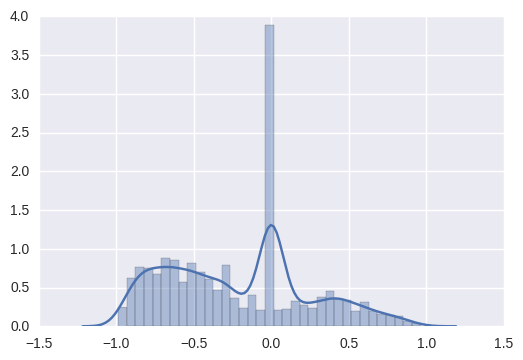

In [16]:
sns.distplot(all_sent)

In [17]:
EMA = pd.Series.ewm(sentiment.ix[2], com=12).mean()
EMA

Top1     0.025800
Top2     0.012384
Top3    -0.274766
Top4    -0.369562
Top5    -0.283371
Top6    -0.365549
Top7    -0.407484
Top8    -0.438703
Top9    -0.322037
Top10   -0.383893
Top11   -0.438096
Top12   -0.438383
Top13   -0.488423
Top14   -0.432673
Top15   -0.325379
Top16   -0.290720
Top17   -0.260643
Top18   -0.226594
Top19   -0.263291
Top20   -0.294378
Top21   -0.323210
Top22   -0.244263
Top23   -0.187022
Top24   -0.170167
Top25   -0.155031
Name: 2, dtype: float64

### Set up Pandas series to get median, mean, exponentially weighted mean

In [18]:
median_sent = pd.Series(index=sentiment.index)

In [19]:
mean_sent = pd.Series(index=sentiment.index)

In [20]:
exp_mean = pd.Series(index=sentiment.index)

In [21]:
sum_5 = pd.Series(index=sentiment.index)

In [22]:
weighted_5 = pd.Series(index=sentiment.index)

In [23]:
for k in range(len(sentiment.index)):
    median_sent[k] = sentiment.iloc[k].median()

In [24]:
for k in range(len(sentiment.index)):
    mean_sent[k] = sentiment.iloc[k].mean()

In [25]:
a = sentiment.ix[2][::-1]

In [26]:
for k in range(len(sentiment.index)):
    exp_mean[k] = pd.stats.moments.ewma(sentiment.ix[k], span=25).mean()

/home/ktt/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=25,min_periods=0,adjust=True).mean()
  from ipykernel import kernelapp as app


In [27]:
sum(sentiment.iloc[4,:5])

-1.1976

In [28]:
sentiment.iloc[4]

Top1     0.2023
Top2    -0.5994
Top3     0.6808
Top4    -0.8689
Top5    -0.6124
Top6    -0.6369
Top7     0.6908
Top8    -0.4404
Top9    -0.6808
Top10   -0.3400
Top11    0.0000
Top12    0.0000
Top13    0.5574
Top14    0.1779
Top15    0.0000
Top16   -0.6249
Top17    0.0000
Top18   -0.7579
Top19   -0.3182
Top20    0.0000
Top21   -0.4404
Top22   -0.5994
Top23    0.1779
Top24   -0.6908
Top25    0.7096
Name: 4, dtype: float64

In [29]:
sum_sent = pd.Series(index=sentiment.index)

In [30]:
for k in range(len(sentiment.index)):
    sum_sent[k] = sentiment.iloc[k].sum()

In [31]:
for k in range(len(sentiment.index)):
    sum_5[k] = sum(sentiment.iloc[k,:5])

In [32]:
sum(1 for k in sum_sent if k > 0)

20

In [33]:
sum(1 for k in exp_mean if k > 0 )

53

In [34]:
w = np.array([5,4,3,2,1])
for k in range(len(sentiment.index)):
    weighted_5[k] = np.dot(pd.Series([j for j in sentiment.iloc[k] if j != 0][0:5]), w)

In [35]:
weighted_5.head()

0    -8.6937
1     3.1435
2    -6.8272
3   -10.0859
4    -1.6939
dtype: float64

In [36]:
features = pd.concat([mean_sent, median_sent, exp_mean, sum_5, weighted_5], axis=1)

In [37]:
mean_sent.head(2)

0   -0.365216
1   -0.161536
dtype: float64

In [38]:
median_sent.head(2)

0   -0.3612
1   -0.1965
dtype: float64

In [39]:
exp_mean.head(2)

0   -0.386302
1   -0.043451
dtype: float64

In [40]:
features.index

RangeIndex(start=0, stop=1989, step=1)

In [41]:
features.head()

,0,1,2,3,4
0,-0.365216,-0.3612,-0.386302,-2.5955,-8.6937
1,-0.161536,-0.1965,-0.043451,0.7221,3.1435
2,-0.241532,0.0000,-0.293818,-1.3711,-6.8272
3,-0.155804,-0.2263,-0.242200,-3.0948,-10.0859
4,-0.176548,-0.3182,-0.170438,-1.1976,-1.6939


## Split data into train and test sets

In [42]:
train_text = features[0:1493] # train features

In [43]:
test_text = features[1493:] # test features

In [44]:
train_labels = labels[0:1493].values # train labels

In [45]:
test_labels = labels[1493:].values; # test labels

In [46]:
# Use Robust Scaler to rescale data
rs = RobustScaler()
train_text_scaled = rs.fit_transform(train_text)
test_text_scaled = rs.transform(test_text)

### Passive Aggressive Classifier

In [47]:
# Set up GridSearch

param_grid = {'loss'  : ['hinge', 'squared_hinge'],
              'C': [10**x for x in np.linspace(-8, 4, 13)]}

In [48]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [49]:
classifier = PassiveAggressiveClassifier(fit_intercept=True,
                                         random_state=0,
                                         n_iter=8)

In [50]:
clf_grid = GridSearchCV(estimator=classifier, param_grid=param_grid, n_jobs=-1, scoring='roc_auc')

In [51]:
clf_grid.fit(train_text_scaled, train_labels.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=PassiveAggressiveClassifier(C=1.0, class_weight=None, fit_intercept=True,
              loss='hinge', n_iter=8, n_jobs=1, random_state=0,
              shuffle=True, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'loss': ['hinge', 'squared_hinge'], 'C': [1e-08, 9.9999999999999995e-08, 9.9999999999999995e-07, 1.0000000000000001e-05, 0.0001, 0.001, 0.01, 0.10000000000000001, 1.0, 10.0, 100.0, 1000.0, 10000.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [52]:
clf_grid.best_estimator_

PassiveAggressiveClassifier(C=0.001, class_weight=None, fit_intercept=True,
              loss='hinge', n_iter=8, n_jobs=1, random_state=0,
              shuffle=True, verbose=0, warm_start=False)

In [53]:
clf_grid.best_params_

{'C': 0.001, 'loss': 'hinge'}

In [54]:
clf_grid.best_score_

0.5328634043176755

In [55]:
y_true, y_pred = test_labels.ravel(), clf_grid.predict(test_text_scaled)

In [56]:
from sklearn.metrics import classification_report

In [57]:
classification_report(y_true, y_pred)

/home/ktt/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'             precision    recall  f1-score   support\n\n          0       0.00      0.00      0.00       240\n          1       0.52      1.00      0.68       256\n\navg / total       0.27      0.52      0.35       496\n'

### SGD Classifier

In [58]:
from sklearn.linear_model import SGDClassifier

In [59]:
classifier = SGDClassifier(loss='squared_loss', n_iter=25)

In [60]:
classifier.fit(train_text, train_labels.ravel())

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='squared_loss', n_iter=25, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [61]:
classifier.score(test_text, test_labels.ravel())

0.53427419354838712

### Logisitc Regression

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
logr = LogisticRegression()

In [64]:
logr.fit(train_text, train_labels.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
logr.score(test_text, test_labels.ravel())

0.5161290322580645

### Ridge Classifier

In [66]:
from sklearn.linear_model import RidgeClassifier

In [67]:
clf = RidgeClassifier()

In [68]:
clf.fit(train_text, train_labels.ravel())

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)

In [69]:
clf.score(test_text, test_labels.ravel())

0.50806451612903225

### Gassian NB

In [70]:
from sklearn.naive_bayes import GaussianNB

In [71]:
gnb = GaussianNB()

In [72]:
gnb.fit(train_text, train_labels.ravel())

GaussianNB(priors=None)

In [73]:
gnb.score(test_text, test_labels.ravel())

0.49596774193548387

### Support Vector Classifier

In [74]:
from sklearn.svm import SVC

In [75]:
supportvc = SVC()

In [76]:
supportvc.fit(train_text, train_labels.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [77]:
supportvc.score(test_text, test_labels.ravel())

0.530241935483871

### Random Forests

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rfc = RandomForestClassifier()

In [80]:
rfc.fit(train_text, train_labels.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [81]:
rfc.score(test_text, test_labels.ravel())

0.48790322580645162

### Adaboost

In [82]:
from sklearn.ensemble import AdaBoostClassifier

In [83]:
abc = AdaBoostClassifier()

In [84]:
abc.fit(train_text, train_labels.ravel())

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [85]:
abc.score(test_text, test_labels.ravel())

0.5161290322580645